<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles EUA, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white")


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('listings.csv');

## Análise dos Dados

Todos os dados utilizados no presente estudo foram obtidos através do site [Inside airbnb](http://insideairbnb.com/get-the-data.html)

Para esta análise exploratória inicial, iremos utilizar apenas o arquivo: 

* `listings.csv` - *Summary information and metrics for listings in Los Angeles.*

In [3]:
# Tipos de variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
dtype: object

**Dicionário das variáveis**

* `id` - Identificador único gerado que representa um imóvel
* `name` - Nome ou apelido da propriedade anunciada
* `host_id` - identificação do proprietário (anfitrião) do imóvel
* `host_name` - Nome do proprietário (anfitrião) do imóvel
* `neighbourhood_group` 
* `neighbourhood` - nome do bairro onde se encontra a propriedade
* `latitude` - latitude da propriedade
* `longitude` - longitude da propriedade
* `room_type` - Tipo do imóvel anunciado
* `price` - Valor do aluguel do imóvel
* `minimum_nights` - Quantidade minima de noites para se reservar
* `number_of_reviews` - Número de reviews realizados para o imóvel
* `last_review` - Data do último review realizado
* `reviews_per_month` - Quantidade de reviews realizados por mês
* `calculated_host_listings_count` - Quantidade de imóveis do anfitrião
* `availability_365` - Quantidade de dias disponíveis para alugar dentro do periodo de 365 dias (1 ano)
* `number_of_reviews_ltm`
* `license` - Licença da propriedade

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115.0,30.0,2.0,2016-05-15,0.02,1.0,193.0,0.0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,89.0,30.0,33.0,2021-11-01,0.70,2.0,300.0,6.0,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,167.0,7.0,21.0,2019-12-27,0.36,2.0,357.0,0.0,228269
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50.0,30.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.11160,-118.38223,Entire home/apt,118.0,31.0,23.0,2018-10-31,0.39,4.0,274.0,0.0,NaN


In [5]:
print('Bairros listados no dataset', len(df.neighbourhood.unique()),'\n')
df.neighbourhood.unique()

Bairros listados no dataset 225 



array(['Culver City', 'Hollywood', 'Santa Monica', 'Bellflower',
       'Hollywood Hills West', 'Del Rey', 'Atwater Village', 'Long Beach',
       'Venice', 'Mid-Wilshire', 'Gardena', 'Hollywood Hills',
       'Redondo Beach', 'Mid-City', 'Valley Village', 'Silver Lake',
       'Highland Park', 'Mount Washington', 'West Los Angeles',
       'Woodland Hills', 'Los Feliz', 'Malibu', 'Torrance',
       'Jefferson Park', 'Studio City', 'Downtown', 'Van Nuys', 'Lynwood',
       'East Hollywood', 'Glendale', 'Mar Vista', 'Beverly Hills',
       'Pasadena', 'Carthay', 'Glassell Park', 'West Hollywood',
       'La Mirada', 'Harvard Heights', 'Encino', 'Lakewood',
       'Ladera Heights', 'North Hills', 'Tujunga', 'Westchester',
       'Fairfax', 'Echo Park', 'Carson', 'North Hollywood', 'Altadena',
       'Calabasas', 'Pacific Palisades', 'Valley Glen', 'Topanga',
       'Sawtelle', 'Unincorporated Santa Monica Mountains',
       'Elysian Valley', 'Palms', 'Pico-Robertson', 'Koreatown',
      

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [6]:
# identificar o volume de dados do DataFrame
print('Quantidade de linhas (registros): \t {}'.format(df.shape[0]))
print('Quantidade de colunas (variáveis): \t {}'.format(df.shape[1]))

Quantidade de linhas (registros): 	 6486
Quantidade de colunas (variáveis): 	 18


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

license                           74.483503
reviews_per_month                 12.843047
last_review                       12.843047
host_name                          0.061671
availability_365                   0.015418
calculated_host_listings_count     0.015418
number_of_reviews                  0.015418
minimum_nights                     0.015418
price                              0.015418
number_of_reviews_ltm              0.015418
neighbourhood_group                0.000000
name                               0.000000
host_id                            0.000000
room_type                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

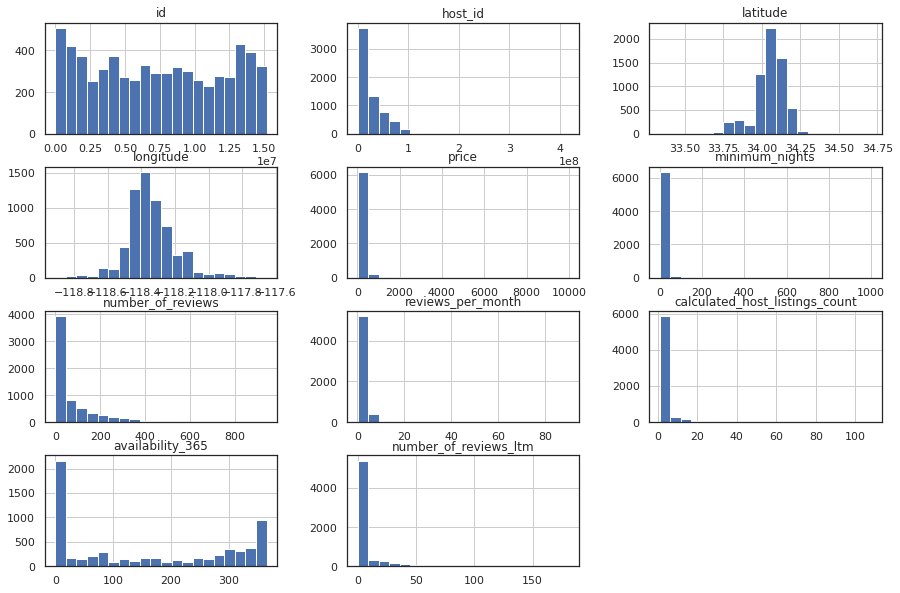

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10));

In [9]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6485.000000,6485.00000,6485.000000,5653.000000,6485.000000,6485.000000
mean,199.541249,23.51596,75.437008,1.582558,3.259676,159.162375
std,404.746380,35.73533,110.881684,2.977947,6.558058,145.206735
min,10.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,76.000000,3.00000,4.000000,0.160000,1.000000,0.000000
50%,119.000000,30.00000,26.000000,0.670000,1.000000,132.000000
75%,195.000000,30.00000,104.000000,2.150000,3.000000,312.000000
max,10000.000000,1000.00000,941.000000,90.000000,108.000000,365.000000


#### Verificando outliers nas variáveis  `minimum_nights` e `price`

A presente análise foi iniciada pelo motivo dos histogramas não estarem plotando uma distribuição normal das variáveis `minimum_nights` e `price`. Sendo assim, suspeitas de outliers foram geradas.

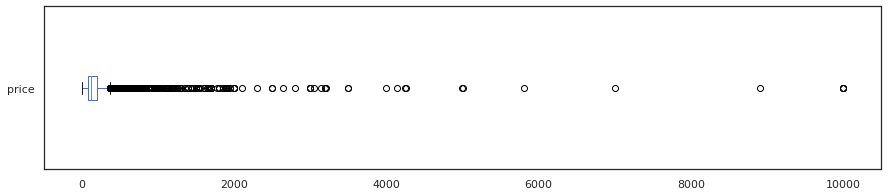

price: valores acima de 350
644 entradas
9.9291%


In [10]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 350 price
print("price: valores acima de 350")
print("{} entradas".format(len(df[df.price > 350])))
print("{:.4f}%".format((len(df[df.price > 350]) / df.shape[0])*100))

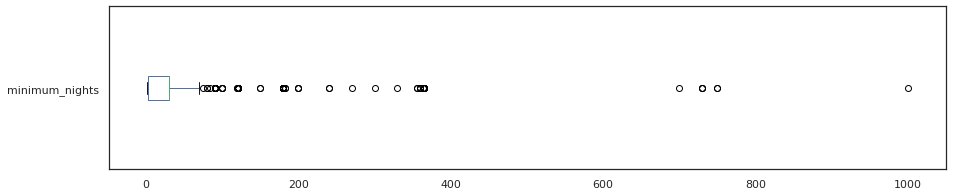

minimum_nights: valores acima de 50
163 entradas
2.5131%


In [11]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 minimum_nights
print("minimum_nights: valores acima de 50")
print("{} entradas".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))

#### Conclusão sobre os outliers

Percebemos que as variáveis `minimum_nights` e `price` possuem
muitos outliers. Portanto, foi utilizado os quartis de 50% e 75% como base
para  determinar o local de corte no dataset.

Os resultados podes ser vistos abaixo.

#### Dataframe com outliers refinados

Identificamos outliers nas variáveis `price` e `minimum_nights` através dos histogramas. Agora, limparemos superficialmente o DataFrame e plotar novamente o histograma.



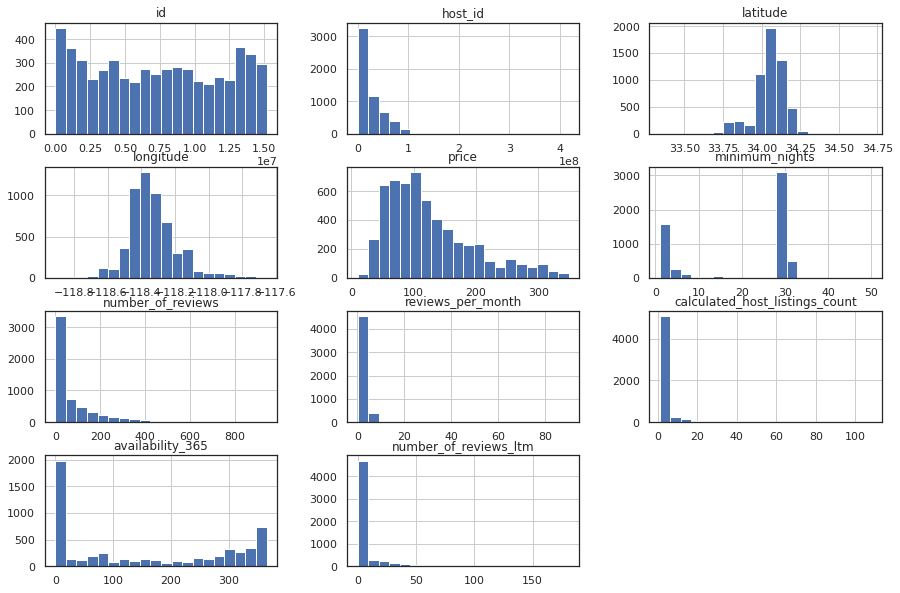

In [12]:
df_no_outliers = df.copy()

df_no_outliers.drop(df_no_outliers[df_no_outliers.price >= 350].index, axis=0, inplace=True)
df_no_outliers.drop(df_no_outliers[df_no_outliers.minimum_nights > 50].index, axis=0, inplace=True)

df_no_outliers.hist(bins=20, figsize=(15, 10));

In [13]:
df_no_outliers.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.654000e+03,5.654000e+03,5654.000000,5654.000000,5653.000000,5653.000000,5653.000000,4967.000000,5653.000000,5653.000000,5653.000000
mean,7.341428e+06,2.500565e+07,34.054302,-118.337086,124.760835,20.351495,79.938617,1.644719,3.323014,153.769149,6.603396
std,4.645307e+06,2.850374e+07,0.110264,0.146511,69.334204,13.169700,115.232431,3.030927,6.650061,144.670864,15.493571
min,1.090000e+02,5.210000e+02,33.340120,-118.911200,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.184836e+06,4.982250e+06,34.002502,-118.433910,75.000000,3.000000,4.000000,0.170000,1.000000,0.000000,0.000000
50%,7.345740e+06,1.572736e+07,34.067595,-118.352750,106.000000,30.000000,29.000000,0.720000,1.000000,121.000000,0.000000
75%,1.157509e+07,3.779146e+07,34.106472,-118.269435,159.000000,30.000000,111.000000,2.290000,3.000000,306.000000,4.000000
max,1.517355e+07,4.181502e+08,34.709720,-117.655470,349.000000,50.000000,941.000000,90.000000,108.000000,365.000000,181.000000


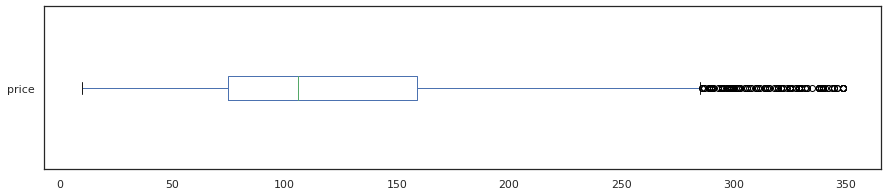

In [14]:
df_no_outliers.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

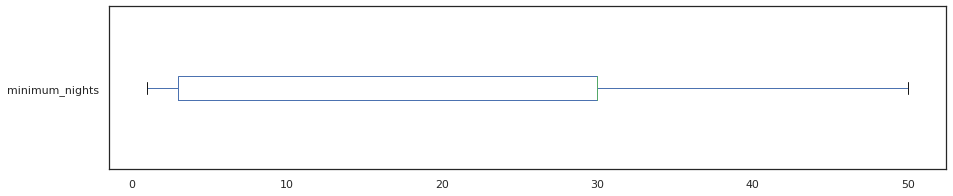

In [15]:
df_no_outliers.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
print("Média da coluna price do dataset com outliers {:.2f}"
  .format(df.price.mean()))

print("Média da coluna price do dataset com outliers reduzidos {:.2f}"
  .format(df_no_outliers.price.mean()))


Média da coluna price do dataset com outliers 199.54
Média da coluna price do dataset com outliers reduzidos 124.76


### **Q4. Qual a correlação existente entre as variáveis**

In [17]:
corr = df_no_outliers[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.070026,0.031181,0.022667,-0.000037,0.096118
minimum_nights,-0.070026,1.000000,-0.263545,-0.245987,0.113144,0.029546
number_of_reviews,0.031181,-0.263545,1.000000,0.553880,-0.024681,0.155855
reviews_per_month,0.022667,-0.245987,0.553880,1.000000,-0.046077,0.087298
calculated_host_listings_count,-0.000037,0.113144,-0.024681,-0.046077,1.000000,0.213235
availability_365,0.096118,0.029546,0.155855,0.087298,0.213235,1.000000


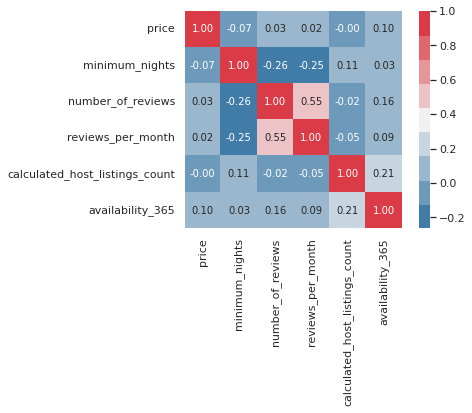

In [18]:
# plotar um heatmap a partir das correlações
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(corr, cmap=cmap, fmt='.2f', square=True, annot=True);

#### Conclusão sobre a correlação das variáveis

Percebemos que às variáveis do dataset são correlatas negativamente. Portanto,
elas não possuem relações diretas entre si.


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# Preparação dos dados para o dataframe
rooms_types = df_no_outliers.room_type.unique()
value_counts = pd.value_counts(
  df_no_outliers.room_type    
)

percentage = (df_no_outliers.room_type.value_counts() / df_no_outliers.shape[0]) * 100

# mostrar a quantidade de cada tipo de imóvel disponível
rooms_type_amount = pd.DataFrame(
    {
        'rooms_types': rooms_types, 'amount': value_counts.array,
        'percentage': np.round(percentage.array, decimals=2)
    }, index=[0,1,2,3,4]
    
)

rooms_type_amount

,rooms_types,amount,percentage
0,Entire home/apt,3534,62.50
1,Private room,1971,34.86
2,Hotel room,142,2.51
3,Shared room,6,0.11
4,Entire,1,0.02


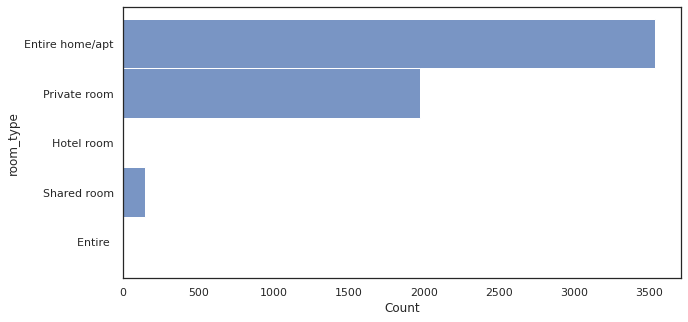

In [20]:
fig_dims = (10, 5)
_, ax = plt.subplots(figsize=fig_dims)

sns.histplot(data=df_no_outliers, y="room_type", ax=ax, bins=15);

### **Q6. Qual é o bairro mais caro no dataset**


In [21]:
# ver preços por bairros, na média
data_grouped_by_neighbourhood_price = df_no_outliers.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

df_neighbourhood_higher_pricing = pd.DataFrame(
    data_grouped_by_neighbourhood_price[:5]
)
df_neighbourhood_higher_pricing.rename({'price': 'average_price'}, axis=1, inplace=True)
df_neighbourhood_higher_pricing.average_price = np.round(df_neighbourhood_higher_pricing.average_price, decimals= 2)

df_neighbourhood_higher_pricing

,average_price
neighbourhood,
Palos Verdes Estates,276.50
Avalon,264.00
Rolling Hills Estates,236.00
Mission Hills,229.00
Malibu,223.17


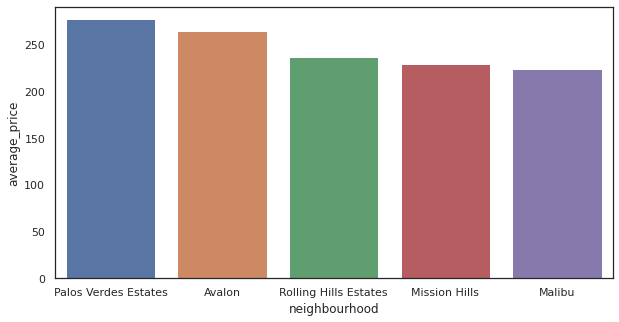

In [22]:
fig_dims = (10, 5)
plt.subplots(figsize=fig_dims)

sns.barplot(data=df_neighbourhood_higher_pricing,
             x=df_neighbourhood_higher_pricing.index, 
             y="average_price")

#### Conclusão

Após a análise realizada sobre bairros mais caros de Los Angeles, constatamos que o bairro mais caro é o `Palos Verdes Estates` com uma média de preço de $ 276.50

### **Q7. Qual é o bairro mais barato no dataset?**

In [23]:
low_price_neighbourhood = data_grouped_by_neighbourhood_price[data_grouped_by_neighbourhood_price.shape[0] - 5 : data_grouped_by_neighbourhood_price.shape[0]]

df_neighbourhood_low_pricing = pd.DataFrame(
    low_price_neighbourhood
)

df_neighbourhood_low_pricing.rename({'price': 'average_price'}, axis=1, inplace=True)
df_neighbourhood_low_pricing.average_price = np.round(df_neighbourhood_low_pricing.average_price, decimals= 2)

df_neighbourhood_low_pricing

,average_price
neighbourhood,
Lake Los Angeles,37.0
La Mirada,33.0
Willowbrook,30.0
Huntington Park,19.0
Watts,17.0


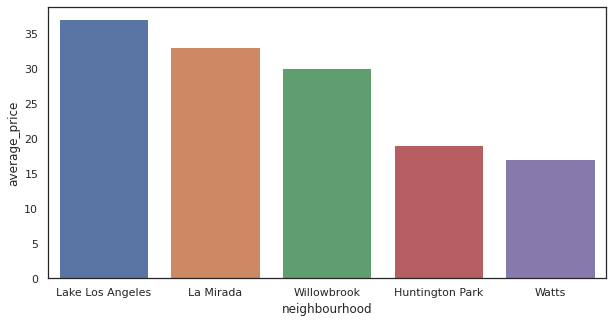

In [24]:
fig_dims = (10, 5)
plt.subplots(figsize=fig_dims)

sns.barplot(data=df_neighbourhood_low_pricing,
             x=df_neighbourhood_low_pricing.index, 
             y="average_price")

#### Conclusão

Após a análise realizada sobre bairros mais baratos de Los Angeles, constatamos que o bairro mais barato é o `Watts` com uma média de preço de $ 17

### **Q8. Plotar os imóveis pela latitude-longitude**

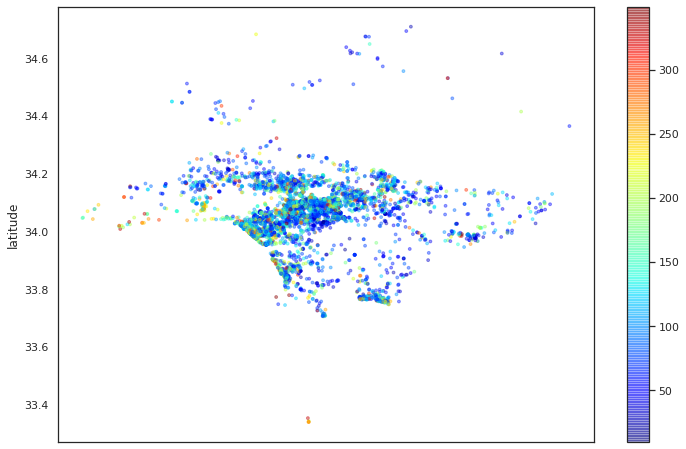

In [25]:
df_no_outliers.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, 
              c=df_no_outliers['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é o bairro mais engajado com reviews mensais?**

In [26]:
data_grouped_by_neighbourhood = df_no_outliers.groupby(['neighbourhood'])

In [27]:
reviews_per_month = data_grouped_by_neighbourhood.reviews_per_month.mean().sort_values(ascending=False)

df_reviews_per_month = pd.DataFrame(
    reviews_per_month
)

df_reviews_per_month.head(10)

,reviews_per_month
neighbourhood,
Alondra Park,13.103333
Lancaster,12.944000
Vincent,11.345000
Sylmar,8.355000
Unincorporated Santa Monica Mountains,7.054500
Gardena,6.650667
Charter Oak,6.250000
Arleta,5.830000
Irwindale,5.476667


In [28]:
df_reviews_per_month[df_reviews_per_month.index == 'Venice']

,reviews_per_month
neighbourhood,
Venice,1.991946


In [29]:
room_type_by_data_neighbourhood = data_grouped_by_neighbourhood.room_type.value_counts().sort_values(ascending=False)

df_room_type_by_data_neighbourhood = pd.DataFrame(
    room_type_by_data_neighbourhood
)
df_room_type_by_data_neighbourhood.rename({'room_type': 'number_of_rooms'}, axis=1, inplace=True)

df_room_type_by_data_neighbourhood.reset_index(level=['room_type'], inplace=True)

df_room_type_by_data_neighbourhood.head()

,room_type,number_of_rooms
neighbourhood,,
Venice,Entire home/apt,362
Hollywood,Entire home/apt,187
Silver Lake,Entire home/apt,144
Santa Monica,Entire home/apt,126
Long Beach,Entire home/apt,120


In [32]:
df_room_type_by_data_neighbourhood[df_room_type_by_data_neighbourhood.index=='Venice']

,room_type,number_of_rooms
neighbourhood,,
Venice,Entire home/apt,362
Venice,Private room,70
Venice,Shared room,2


#### Conclusão

Após a análise realizada sobre bairros mais engajados de Los Angeles, constatamos que o bairro com maior número de reviews mensais é o `Alondra Park` com a **média de 13 reviews por mês**. Acaba sendo curioso, pois  `Alondra Park` tem apenas 3 propriedades para alocação enquanto `Venice`, que é uma das localizações com mais propriedades **(434)**, possui a **média de 2 reviews mensais.**

### **Q10. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [31]:
# ver a média da coluna `minimum_nights``
print('A média do mínimo de noites é {}'.format(int(df_no_outliers.minimum_nights.mean())))

A média do mínimo de noites é 20


## Conclusões


O presente estudo começou como uma análise superficial pois percebemos que ass variáveis presentes no dataset não possuem correlação entre si. Mas, no decorrer da exploração dos dados, informações e hipóteses foram levantadas, como por exemplo: A média dos valores de aluguel no dataset; Os bairros mais caros e baratos de Los Angeles; Tipo dos imóveis mais alugados; número de reviews mensais de bairros com mais propriedades contra bairros com menos propriedades e a quantidade de imóveis por bairro.

 